In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from PIL import Image

In [2]:
tn_map = np.load("tn_average_filtered_saliency.npz")["arr_0"]
tn_map_list = tn_map.tolist()
max_tn_value = tn_map.max()
min_tn_nonzero_value = 0.0007135627674870193

tp_map = np.load("tp_average_filtered_saliency.npz")["arr_0"]
tp_map_list = tp_map.tolist()
max_tp_value = tp_map.max()
min_tp_nonzero_value = 0.0009575000149197876

## Replace white by dark colors

In [3]:
def map_value_to_grayscale(value, min_value, max_value, min_color, max_color):
    scaled_value = (value - min_value) / (max_value - min_value)
    graycolor_scale = max_color - min_color
    graycolor = scaled_value * graycolor_scale + min_color
        
    return int(graycolor)

In [4]:
min_color = 0
max_color = 255

modified_tn_map_list = []
for row in tn_map_list:
    
    tmp_row = []
    for value in row:
        grayscale_value = map_value_to_grayscale(value, min_tn_nonzero_value, max_tn_value, min_color, max_color)
        rgb_value = [grayscale_value, 0, 0]
        tmp_row.append(rgb_value)
        
    modified_tn_map_list.append(tmp_row)
    
modified_tp_map_list = []
for row in tp_map_list:
    
    tmp_row = []
    for value in row:
        grayscale_value = map_value_to_grayscale(value, min_tp_nonzero_value, max_tp_value, min_color, max_color)
        rgb_value = [0, grayscale_value, 0]
        tmp_row.append(rgb_value)
        
    modified_tp_map_list.append(tmp_row)    


In [5]:
rgb_tn_map = np.asarray(modified_tn_map_list)
rgb_tp_map = np.asarray(modified_tp_map_list)

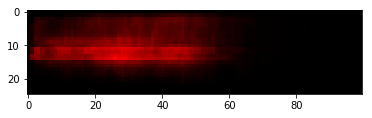

In [6]:
plt.imshow(rgb_tn_map)

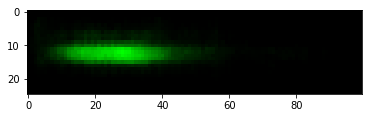

In [7]:
plt.imshow(rgb_tp_map)

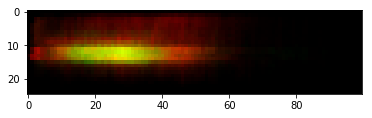

In [8]:
mixed_map = rgb_tn_map + rgb_tp_map
plt.imshow(mixed_map)

In [9]:
def save_color_image(image, output_filename):
    plt.figure(figsize=(10,3))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(output_filename, bbox_inches='tight', transparent=True, pad_inches=0)

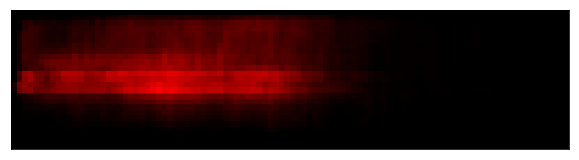

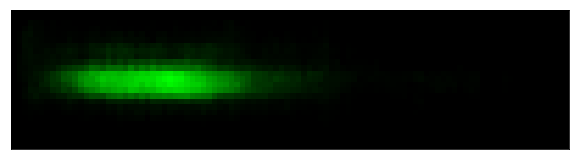

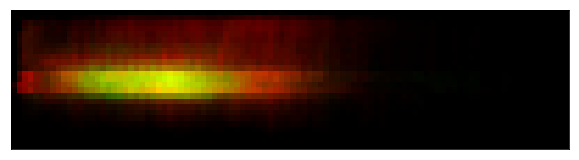

In [10]:
save_color_image(rgb_tn_map, "monochromatic_tn_map.png")
save_color_image(rgb_tp_map, "monochromatic_tp_map.png")
save_color_image(mixed_map, "mixed_saliency_map.png")